# 数据处理模板

## 预设

### 导入库

In [50]:
import sys
sys.path.append("..")
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from utils import *

### 全局参数

In [51]:
StatisticsDataFilePath = 'data/西安城市形象编码词表_统计_数量分布.pkl'
DataFilePath = 'data/西安城市形象数据_关键词_议题分类_时间分割.pkl'

### 全局设置

In [52]:
# 支持中文
print(matplotlib.matplotlib_fname())
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    if 'Song' in i:
        print(i)
plt.rcParams['font.sans-serif'] = ['Songti SC'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# 显示清晰
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/zack/.pyenv/versions/3.11.0/envs/NLP_Basic/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc
Songti SC


## 函数工具

In [72]:
# pandas 获取平台总数统计
def get_app_time_counts(df_data, group_name, app_name = None):
    if not app_name:
        return df_data.groupby(group_name).agg('count').iloc[:,0].astype('Int64')
    return df_data[df_data['平台']==app_name].groupby(group_name).agg('count').iloc[:,0].astype('Int64')

## 数据读取

In [54]:
data = pd.read_pickle(DataFilePath)
# data = data.sample(10).reset_index(drop=True)

In [55]:
dictionary_data_statistics = pd.read_pickle(StatisticsDataFilePath)

## 数据处理

In [35]:
# 分割统计（按时间段）
data_time_count = pd.DataFrame()
data_time_count['总数'] = get_app_time_counts(data, '发布时间_group')
for app_name in ['豆瓣','知乎','微博']:
    data_time_count[app_name] = get_app_time_counts(data, '发布时间_group', app_name)

In [76]:
# 分割统计（按字符串）
data_time_count = pd.DataFrame()
data_time_count['总数'] = get_app_time_counts(data, '发布时间月份')
for app_name in ['豆瓣','知乎','微博']:
    data_time_count[app_name] = get_app_time_counts(data, '发布时间月份', app_name)
data_time_count = data_time_count.fillna(0)


## 数据展示

In [81]:
data_to_show = data_time_count
data_to_show[data_to_show['微博'] == 0]

,总数,豆瓣,知乎,微博
发布时间月份,,,,
2021-09,467,32,435,0
2021-10,207,38,169,0
2021-11,313,43,270,0
2022-08,643,72,571,0
2022-09,96,96,0,0
2022-10,58,58,0,0


## 数据可视化

### 总数统计

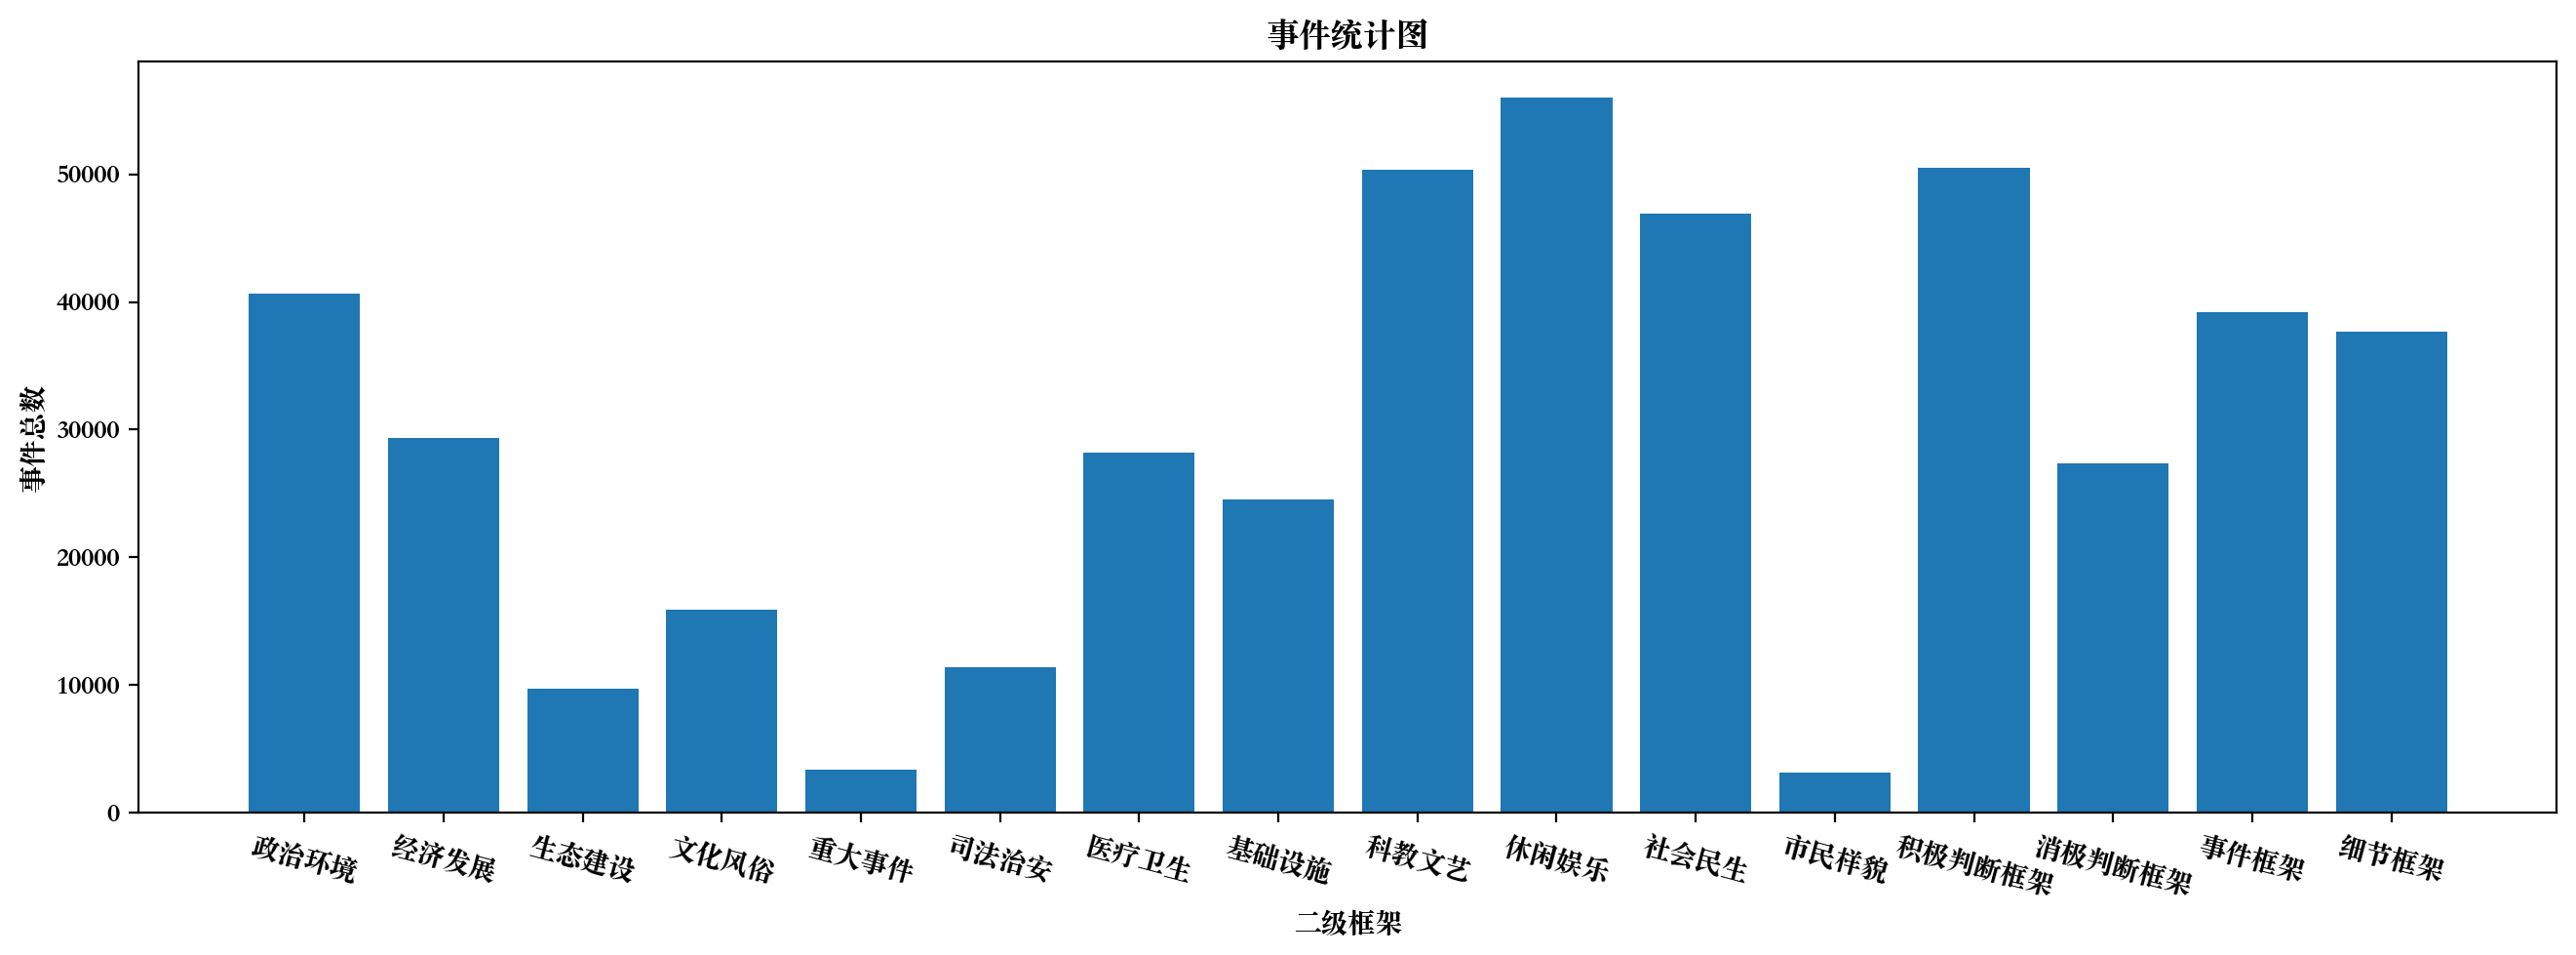

In [7]:
df_to_vis = dictionary_data_statistics
fig, ax = plt.subplots(figsize=(16, 5))
labels = df_to_vis.index
counts = df_to_vis['总数']
ax.bar(labels, counts)
ax.set_xlabel('二级框架')
ax.set_ylabel('事件总数')
ax.set_title('事件统计图')
plt.xticks(rotation=-15)    # 设置x轴标签旋转角度
plt.show()

### 时间分割统计

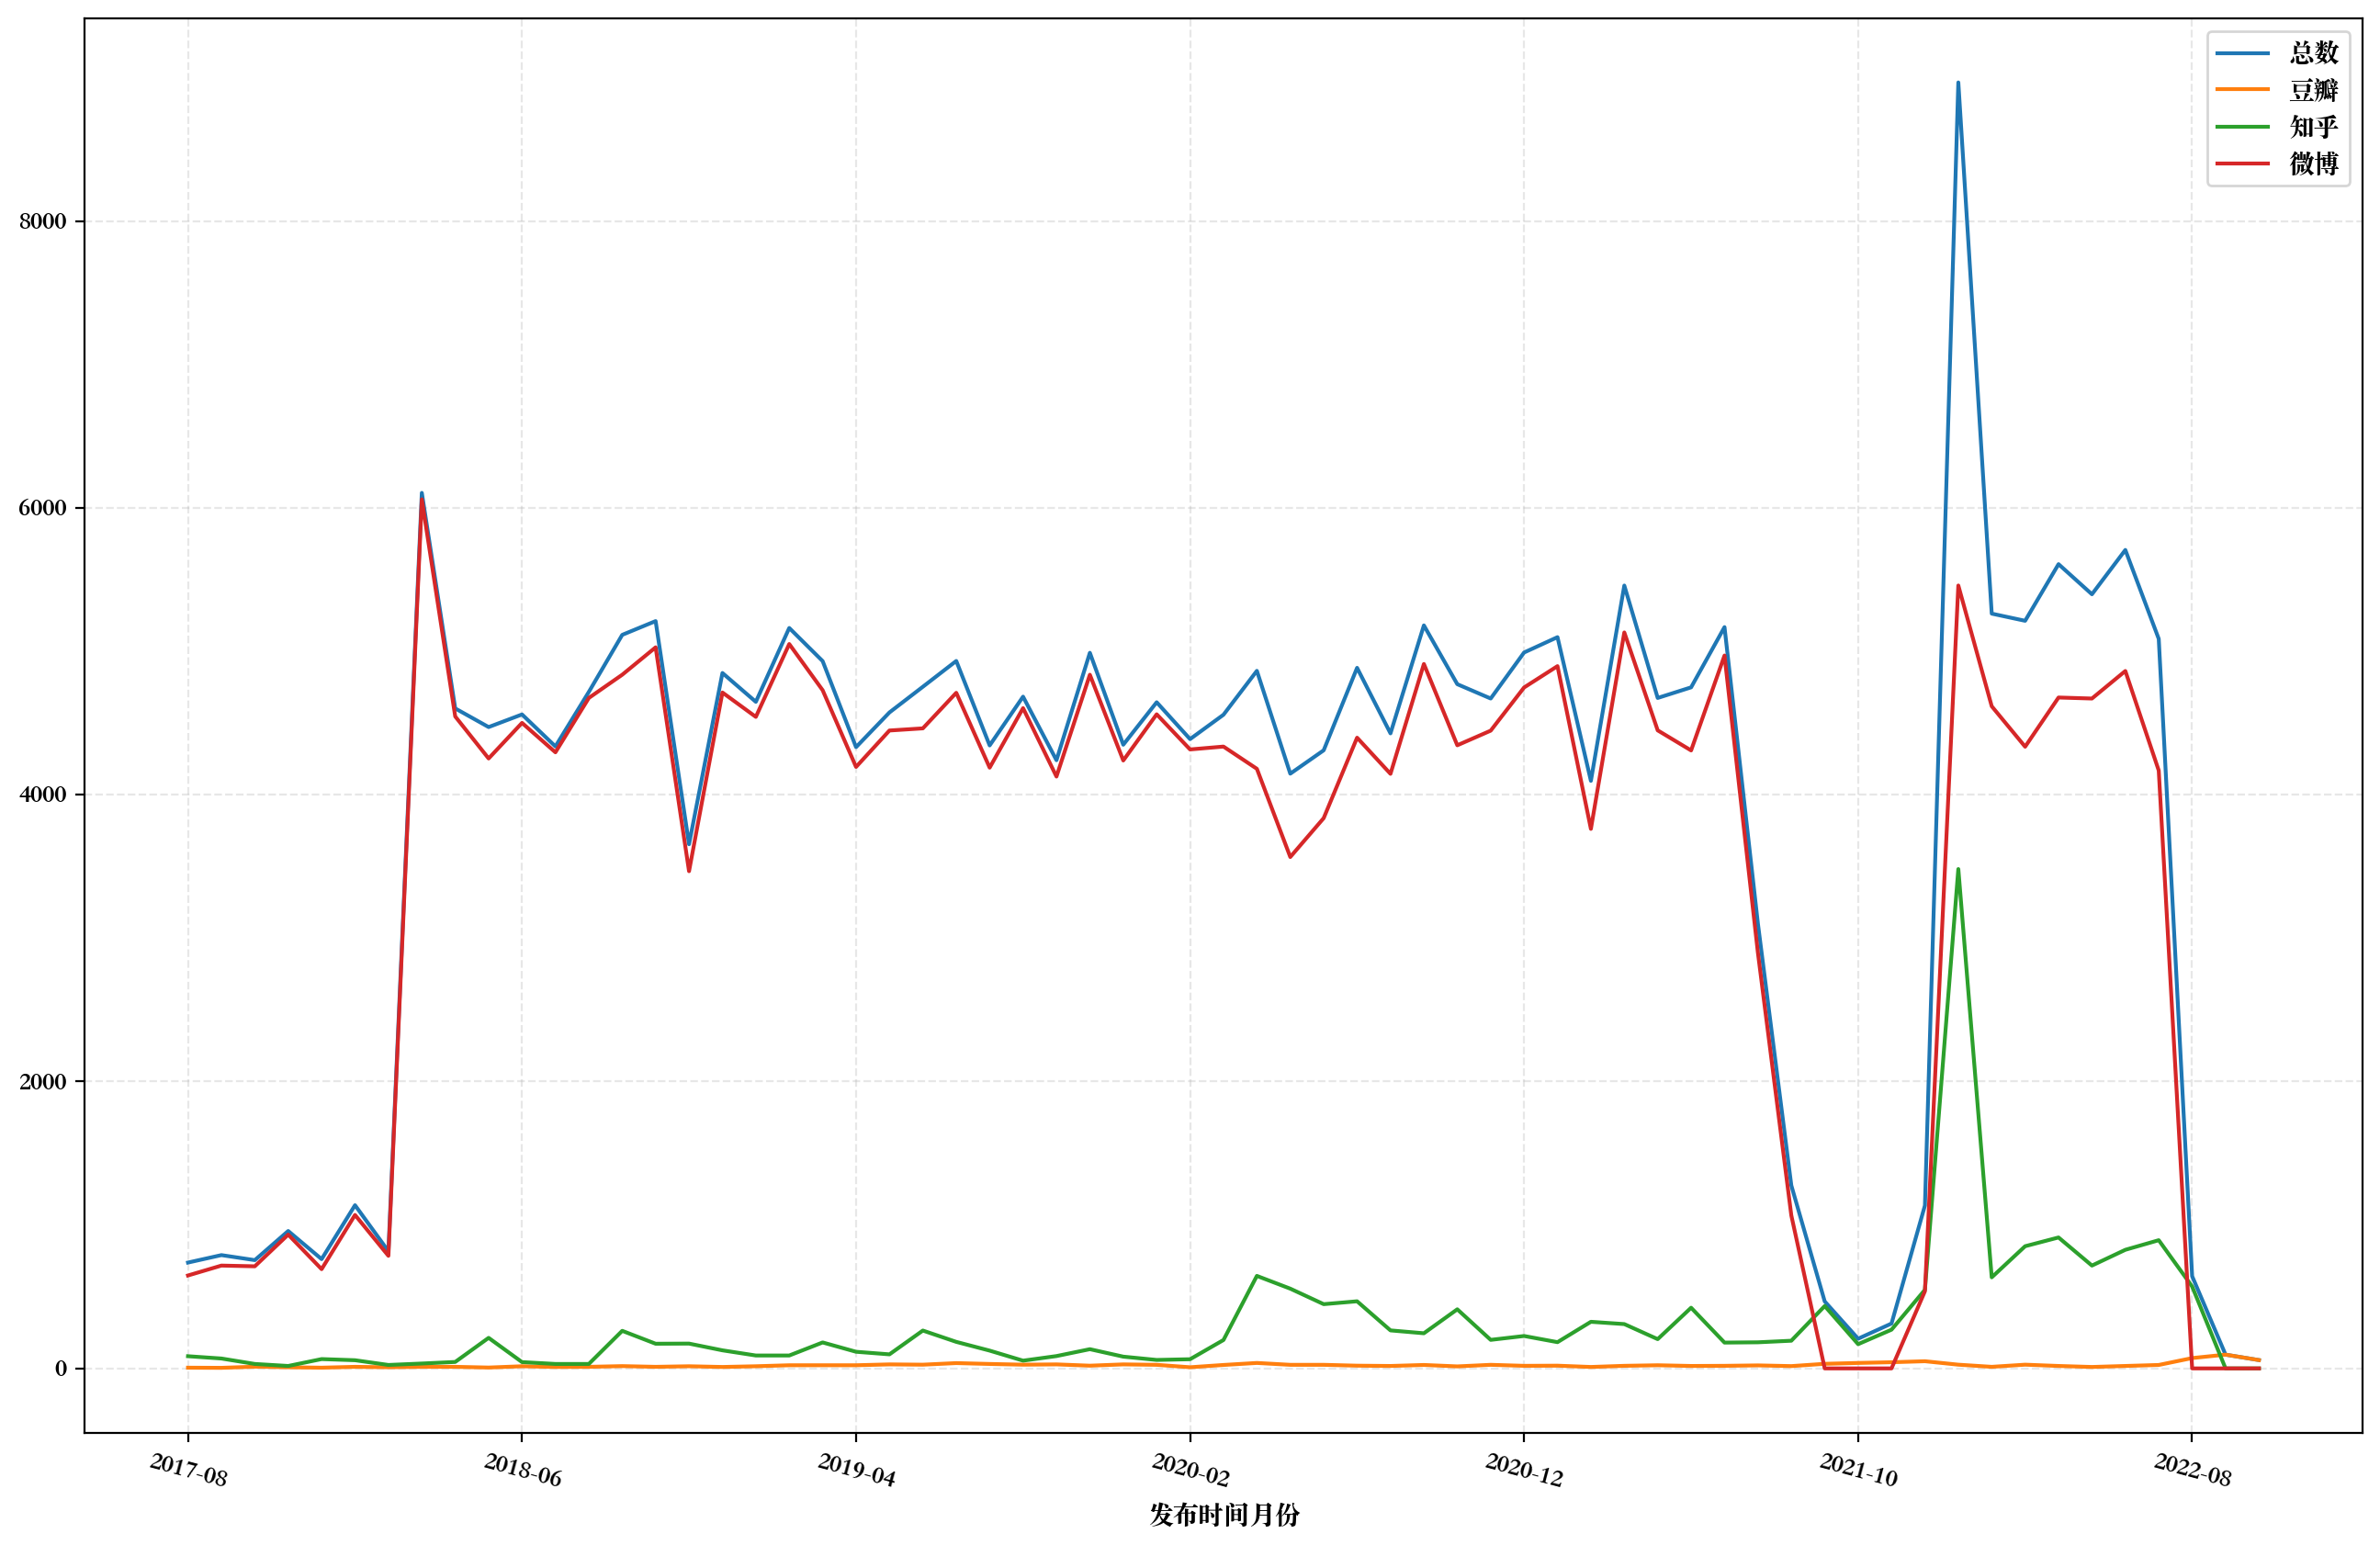

In [80]:
ax = data_time_count.loc[:, ['总数', '豆瓣','知乎','微博']].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
# plt.xlim((pd.Timestamp('2021-11'), pd.Timestamp('2022-9')))
# plt.xticks(pd.date_range(start ='2021-11', end = '2022-9', freq='M'))
plt.xticks(rotation=-15) 
plt.show()

## 数据保存